In [1]:
%cd /content/drive/MyDrive/

/content/drive/MyDrive


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import collections
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import  cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

%matplotlib inline
import os

In [3]:
df=pd.read_csv('RPData.csv')
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198
0,0.386226,-0.194415,0.330931,-0.080950,-0.121936,0.249046,-0.479304,0.183037,-0.410358,0.337929,-0.057014,-0.165875,0.131422,-0.018627,0.096007,0.030043,-0.187893,0.223272,0.678397,0.029838,0.100265,0.297374,0.432172,-0.281538,-0.107244,0.545768,0.166512,-0.042438,0.018523,0.247700,0.039102,0.322624,-0.322687,-0.039814,0.365158,-0.149717,-0.086207,0.031574,0.144055,-0.239371,...,-0.366619,-0.187442,0.123282,-0.108622,0.202259,-0.144589,0.364835,0.298720,-0.058422,-0.032753,0.023685,0.039820,-0.428215,-0.234933,0.140237,-0.238673,-0.082886,-0.280058,0.036175,-0.156492,0.131750,0.385701,-0.089433,0.023563,-0.123642,-0.357884,0.463786,0.177176,-0.369341,0.412686,-0.095436,-0.421078,-0.082276,-0.107021,-0.199851,0.066728,-0.322579,-0.574550,-0.505704,0.0
1,0.399587,0.149411,0.090339,0.092578,0.098899,0.060519,-0.194412,0.003753,-0.178617,0.360749,-0.012784,-0.103283,0.085530,0.204337,0.023145,0.060043,-0.502876,-0.160062,0.301940,0.230423,-0.012232,0.153292,0.054628,-0.212399,-0.252982,0.681360,0.109124,0.230034,0.142518,0.076143,-0.060665,0.151922,-0.347630,-0.260092,0.237754,0.090039,-0.170468,0.280143,-0.051722,-0.313403,...,-0.100402,0.083973,-0.322190,-0.116570,0.166710,-0.223722,-0.075971,-0.142000,-0.268325,-0.149952,0.107687,0.236470,-0.392234,-0.149835,0.228827,-0.253988,0.049807,-0.362958,-0.277021,-0.361440,0.467101,0.482050,-0.151459,-0.167466,0.028294,-0.193450,0.240294,0.188020,0.032511,0.103768,0.541854,-0.282826,0.032349,0.131784,0.120112,0.277956,-0.257447,-0.656353,-0.238033,0.0
2,-0.635293,-0.357216,-0.086996,0.552285,-0.220353,0.331932,-0.126352,0.550152,-0.148278,0.856872,0.430482,0.261504,-0.555572,0.034948,0.091820,-0.036102,-0.054182,0.155280,0.568135,0.299717,0.286586,-0.494375,0.396683,-0.040400,0.274268,-0.737182,-0.091220,-0.625131,0.236607,0.101315,0.022691,0.439678,0.151995,-0.184294,0.168245,0.163528,0.259277,0.311687,0.118601,-0.100362,...,-0.334802,0.298667,-0.075378,-0.134389,0.594794,0.324098,0.676073,-0.610689,-0.673784,0.183959,-0.230151,0.710528,0.350141,0.180428,0.424100,-0.171250,0.199884,-0.532614,-0.506255,0.135658,0.012041,-0.073950,0.080413,-1.005754,0.604921,0.082155,-0.072410,0.000973,0.176883,-0.377000,-0.094069,0.165244,0.378714,-0.024575,-0.125366,0.074182,-0.140925,0.442084,-0.090015,0.0
3,-0.504955,-0.210174,-0.388036,0.429350,-0.147691,0.452599,-0.128001,0.829695,0.085156,0.751509,0.318261,0.416919,-0.089747,-0.156286,-0.142861,0.360458,-0.033655,0.335617,0.427276,0.305094,-0.145872,-0.749884,0.552803,-0.309282,-0.089273,-0.552630,-0.091373,-0.689190,0.445958,-0.033215,-0.388953,-0.025315,-0.216385,-0.078686,0.489151,-0.179600,0.586540,0.132364,0.260211,-0.133131,...,-0.667673,0.502363,-0.010600,-0.139679,-0.203259,0.468294,0.473596,-0.608127,-0.364951,0.124190,-0.282622,0.305000,-0.002202,0.088042,0.405833,-0.183397,-0.139946,-0.222543,-0.285041,0.570135,-0.113238,-0.461111,0.069716,-0.997274,0.863604,0.045175,-0.402077,0.099908,0.181810,-0.008361,-0.509507,-0.078836,0.485816,0.057037,0.168173,0.178002,-0.378890,0.742762,-0.532036,0.0
4,-0.451450,-0.317335,0.014329,0.272441,0.464784,0.515309,-0.181687,0.150943,-0.386290,0.240848,-0.585303,0.812951,-0.110428,0.650195,-0.108838,-0.843769,0.420640,-0.239170,-0.272996,0.286678,0.236476,0.954324,-0.450750,0.118752,0.748265,-0.033340,0.144523,0.475339,-0.102429,0.322947,-0.607576,-0.126286,0.054883,-0.065531,0.110547,0.062016,0.043886,-0.476529,0.306178,0.387925,...,0.514616,0.276077,-0.447196,0.174467,-0.334729,-0.105972,-0.453428,0.370229,0.078906,0.090886,-0.018268,0.624226,-0.122566,-0.296577,-0.098045,-0.553331,0.741688,-0.893543,0.182777,-0.549794,-0.126693,0.146222,0.269021,-1.257747,0.176400,0.483786,0.219323,0.156883,-0.481292,0.405616,-0.885015,-0.273574

In [ ]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198
count,3948.000000,3948.000000,3948.000000,3948.000000,3948.000000,3948.000000,3948.000000,3948.000000,3948.000000,3948.000000,3948.000000,3948.000000,3948.000000,3948.000000,3948.000000,3948.000000,3948.000000,3948.000000,3948.000000,3948.000000,3948.000000,3948.000000,3948.000000,3948.000000,3948.000000,3948.000000,3948.000000,3948.000000,3948.000000,3948.000000,3948.000000,3948.000000,3948.000000,3948.000000,3948.000000,3948.000000,3948.000000,3948.000000,3948.000000,3948.000000,...,3948.000000,3948.000000,3948.000000,3948.000000,3948.000000,3948.000000,3948.000000,3948.000000,3948.000000,3948.000000,3948.000000,3948.000000,3948.000000,3948.000000,3948.000000,3948.000000,3948.000000,3948.000000,3948.000000,3948.000000,3948.000000,3948.000000,3948.000000,3948.000000,3948.000000,3948.000000,3948.000000,3948.000000,3948.000000,3948.000000,3948.000000,3948.000000,3948.000000,3948.000000,3948.000000,3948.000000,3948.000000,3948.000000,3948.000000,3948.000000
mean,-0.007409,-0.008851,-0.023935,0.035460,-0.091811,0.062494,0.096514,0.096448,-0.071297,0.016656,0.025355,0.081586,-0.031319,-0.049809,-0.033958,0.128835,-0.002586,0.061459,-0.001304,0.041754,0.027735,-0.020176,-0.060795,-0.016205,-0.009703,0.002450,0.099373,-0.057460,-0.033305,0.035086,0.095001,0.105311,-0.042652,0.062194,0.164813,0.028930,0.120625,0.097323,-0.000215,0.013984,...,-0.062361,-0.007333,-0.000744,0.081834,0.044695,-0.077302,0.010298,0.008601,-0.028316,-0.010526,-0.091178,0.013449,0.024822,0.019587,0.108856,-0.107411,0.029474,0.031841,-0.014185,0.048687,0.042989,-0.031036,0.140622,-0.111295,0.075261,0.049579,-0.080611,0.125783,-0.060339,-0.049456,0.048422,-0.062920,0.022808,-0.119150,0.001073,0.083997,0.048833,-0.080732,-0.122055,0.666667
std,0.231491,0.258677,0.230651,0.213777,0.242912,0.208478,0.225198,0.210967,0.220961,0.218594,0.210060,0.212678,0.250640,0.212959,0.211338,0.295593,0.227572,0.238225,0.248886,0.229218,0.239763,0.221924,0.220993,0.225431,0.248004,0.222668,0.242524,0.203291,0.222382,0.216966,0.293315,0.217032,0.201788,0.202618,0.242004,0.230822,0.245213,0.256703,0.202742,0.198618,...,0.224633,0.224079,0.216913,0.217797,0.233999,0.236201,0.241006,0.241696,0.216365,0.200927,0.196993,0.240276,0.200089,0.241308,0.250190,0.205810,0.227970,0.214645,0.269026,0.214742,0.197614,0.197669,0.223971,0.239189,0.212288,0.232772,0.242042,0.240381,0.198554,0.222828,0.281368,0.229355,0.214027,0.219250,0.230434,0.243617,0.229466,0.226222,0.231794,0.471464
min,-0.964812,-1.388839,-0.923383,-1.146866,-1.086181,-1.001946,-0.690061,-0.680092,-1.078976,-1.019057,-0.853088,-0.760907,-1.179174,-0.779760,-0.849942,-0.862523,-0.827377,-0.725989,-1.031045,-0.918814,-1.069269,-0.824782,-0.850772,-0.916797,-0.839612,-0.784771,-1.014119,-0.809409,-1.080132,-0.845575,-0.821594,-0.880985,-0.987659,-0.641989,-0.673269,-0.712398,-0.569659,-0.824489,-0.791937,-0.892484,...,-1.023165,-1.024647,-0.821626,-0.679608,-0.930427,-1.061740,-0.929206,-0.830962,-1.013812,-0.799593,-1.071285,-0.952644,-0.937658,-1.005209,-0.799729,-1.045484,-0.804030,-0.962170,-0.930449,-0.678896,-0.805348,-0.810718,-0.677739,-1.358612,-0.694291,-0.654659,-1.078213,-0.747684,-0.845959,-0.805570,-0.897648,-1.120968,-0.761866,-0.837907,-1.008688,-1.152677,-1.246662,-1.253252,-0.937897,0.000000
25%,-0.135024,-0.118408,-0.164389,-0.076259,-0.224872,-0.037639,-0.023486,-0.013557,-0.173681,-0.101115,-0.072377,-0.029632,-0.153956,-0.183425,-0.149831,-0.019537,-0.138068,-0.077487,-0.152307,-0.086520,-0.102103,-0.137771,-0.180512,-0.148179,-0.134959,-0.119234,-0.022639,-0.170378,-0.159120,-0.070650,-0.085007,-0.024585,-0.149500,-0.059935,0.022042,-0.113271,-0.022285,-0.025853,-0.121480,-0.095329,...,-0.195973,-0.129020,-0.119971,-0.024885,-0.08628

In [ ]:
df['0']

0       0.386226
1       0.399587
2      -0.635293
3      -0.504955
4      -0.451450
          ...   
3943   -0.236140
3944   -0.732517
3945    0.470655
3946    0.070432
3947   -0.220942
Name: 0, Length: 3948, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

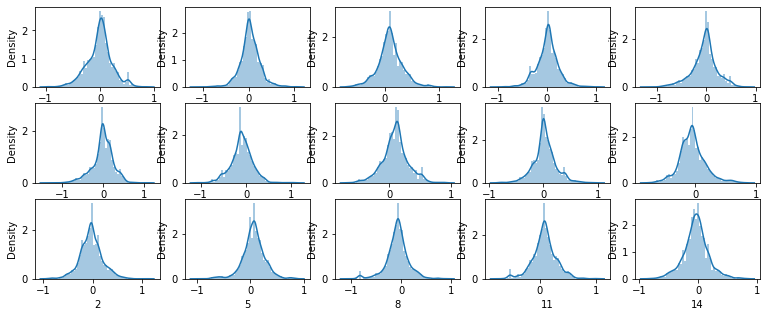

In [ ]:
fig,ax=plt.subplots(nrows=3,ncols=5)
fig.set_figheight(5)
fig.set_figwidth(13)


for i in range(5):
  one = 3*i + 0;
  one1 = 3*i + 1;
  one2 = 3*i + 2;
  sns.distplot(df[str(one)],ax=ax[0, i])
  sns.distplot(df[str(one1)],ax=ax[1, i])
  sns.distplot(df[str(one2)],ax=ax[2, i])

In [ ]:
# Run this at night for an hour top get the plots

# print("                                              add/non-ad  vs   Features")
# fig,ax=plt.subplots(nrows=1,ncols=1)
# fig.set_figheight(15)
# fig.set_figwidth(18)
# # sns.stripplot(y=1558,x=0,data=df,ax=ax[0])
# # sns.stripplot(y=1558,x=1,data=df,ax=ax[1])
# # sns.stripplot(y=1558,x=2,data=df,ax=ax[2])

# for i in range(1):
#   sns.stripplot(y = str(15), x = str(i), data = df, ax=ax[i])

# plt.show()

In [ ]:
# plt.figure(figsize=(15,10))
# sns.boxplot(x='15',y='1',data=df)
# plt.xlabel('label-add/non-ad')
# plt.ylabel('width')
# plt.title("Boxplot-  Target Vs Width ")
# plt.show()

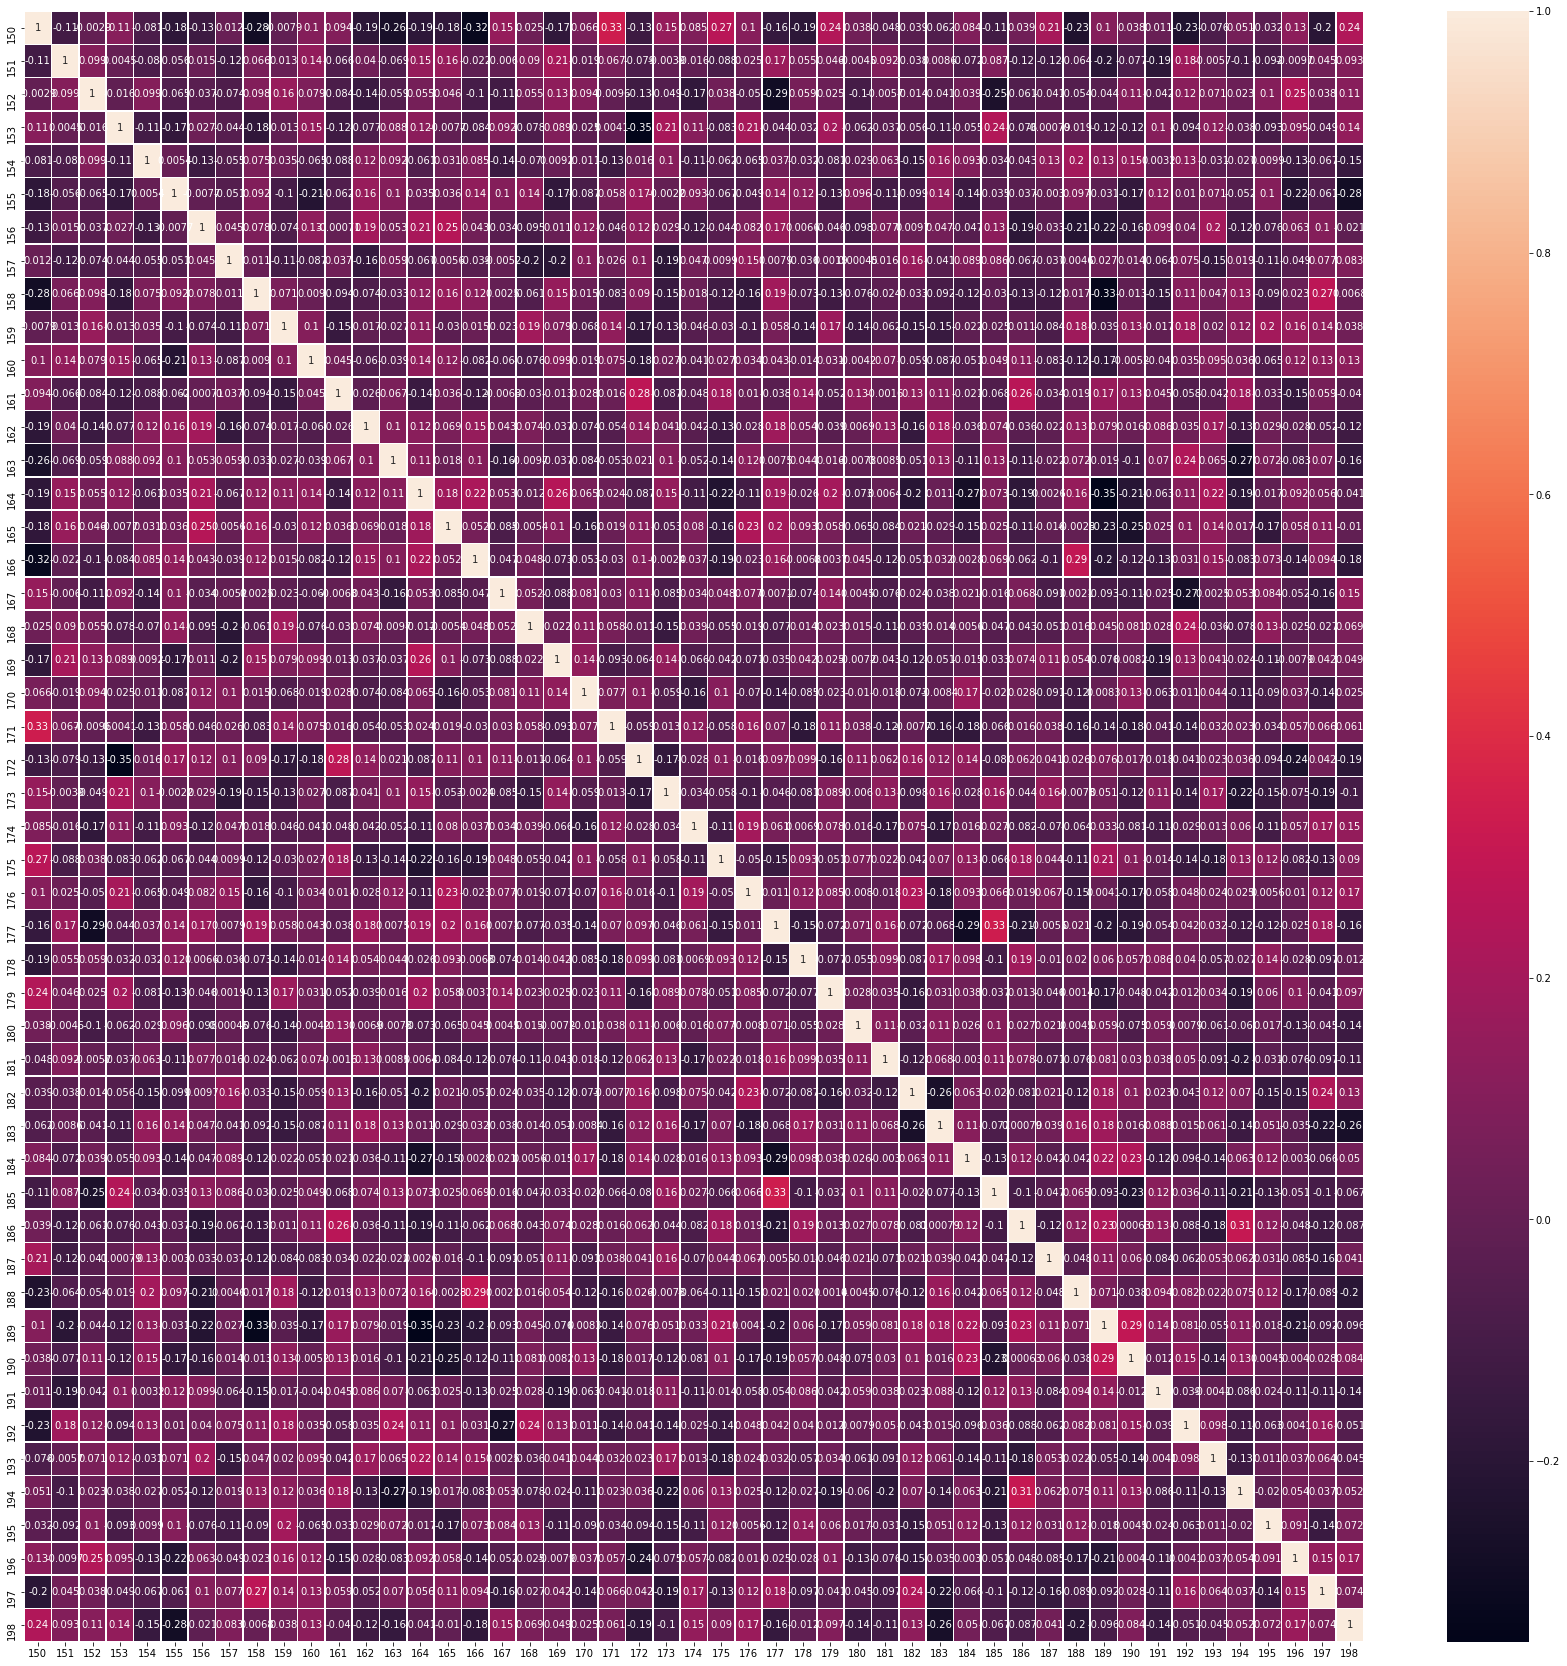

In [ ]:
columns_for_visualization = list()
for i in range(49):
  columns_for_visualization.append(str(i + 150))
corr=df[columns_for_visualization].corr()
fig, ax = plt.subplots(figsize=(30,30))
sns.heatmap(corr,annot=True,linewidths=.5, ax=ax)

In [7]:
da=df.values
X=da[:,:-1]
y=da[:,-1]


xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.30,random_state=80)


In [6]:
def fit_models(classifiers,xtrain,ytrain):
    """This function fit multiple models by sklearn and return the dictionary with values as  objects of models"""
    models=collections.OrderedDict()
    for constructor in classifiers:
        obj=constructor()
        obj.fit(xtrain,ytrain)
        models[str(constructor).split(':')[0]]=obj
    return models

def classification_multi_report(ytest,models_array):
    """This function generate classification accuracy report for given input model objects"""
    for i in models_array:
        print('__________________________________________________')
        print('the model - '+str(i))
        print(classification_report(ytest,models_array[i].predict(xtest)))
def cross_Function(models,cv):
    """This function return cross validated accuray and the variance of given input model obejects"""
    accuracy={}
    for model in models:
        cross_val_array=cross_val_score(models[model],xtrain,ytrain,scoring='accuracy',cv=cv)
        accuracy[model]=[np.mean(cross_val_array),np.std(cross_val_array)]
    return accuracy

def multi_grid_search(param_grid_array,estimator_list,x,y):
    """This function calculate the grid search parameters and accuracy  for given input modles and return dictionary with each tupple containing accuracy and best parameters"""
    d={}
    count=0
    for i in estimator_list:
        gc=GridSearchCV(estimator=estimator_list[i],param_grid=param_grid_array[count],scoring ='accuracy',cv=5).fit(x,y)
        d[i]=(gc.best_params_,gc.best_score_)
        count+=1
    return d

In [15]:
classifiers=[DecisionTreeClassifier]

# classifiers=[GaussianNB,SVC,KNeighborsClassifier]

model_list=fit_models(classifiers,xtrain,ytrain)

classification_multi_report(ytest,model_list)

__________________________________________________
the model - <class 'sklearn.tree._classes.DecisionTreeClassifier'>
              precision    recall  f1-score   support

         0.0       0.83      0.86      0.84       387
         1.0       0.93      0.91      0.92       798

    accuracy                           0.90      1185
   macro avg       0.88      0.89      0.88      1185
weighted avg       0.90      0.90      0.90      1185



In [9]:

obj=cross_Function(model_list,cv=20)
for model in obj:
    print('the model -'+str(model)+'has \n || crosss validated accuracy as  -> '+str(obj[model][0])+' | variance - '+str(obj[model][1])+' ||' )
    print('______________________________________________________________________________________________________________')

the model -<class 'sklearn.tree._classes.DecisionTreeClassifier'>has 
 || crosss validated accuracy as  -> 0.9153190491085395 | variance - 0.02342687798117454 ||
______________________________________________________________________________________________________________


In [ ]:
param_grid_svm=[
    {
        'kernel':['linear'],'random_state':[0]
    },
     {
        'kernel':['rbf'],'random_state':[0]
     },
    
    {
        'kernel':['poly'],'degree':[1,2,3,4],'random_state':[0]
    }
]

param_grid_knn=[

    {   
        'n_neighbors':np.arange(1,3),
        'p':[2]
        
    }
]

param_RandomForest = [
    {
        'n_estimators': np.arange(100, 500, 100)
        # 'max_depth' : [3, 5, 10]
    }
]

param_XGB=[
    {
        'n_estimators' : np.arange(100, 500, 100)
    }
]

param_logit = [
  {
      
  }
]

param_XGBoost=[
    {
        'n_estimators': np.arange(100, 500, 100)
        # 'max_depth' : [3, 5]
    }
]

param_grid_array=[param_grid_knn, param_RandomForest, param_XGBoost]
multi_grid_search(param_grid_array,model_list,xtrain,ytrain)

{"<class 'sklearn.ensemble._forest.RandomForestClassifier'>": ({'n_estimators': 300},
  0.975754776318893),
 "<class 'sklearn.neighbors._classification.KNeighborsClassifier'>": ({'n_neighbors': 1,
   'p': 2},
  0.9659833058154467),
 "<class 'xgboost.sklearn.XGBClassifier'>": ({'n_estimators': 400},
  0.9779201719212726)}

**Fitting model with best hyperparmater and cv score**

In [ ]:
classifier=XGBClassifier(n_estimators =  400)
classifier.fit(xtrain,ytrain)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=400, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

Confusion Matrix

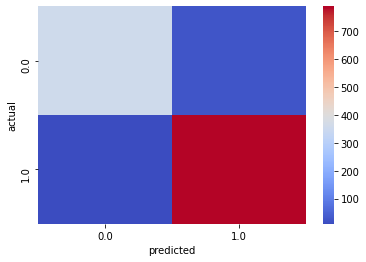

In [ ]:
sns.heatmap(pd.crosstab(ytest,classifier.predict(xtest)),cmap='coolwarm')
plt.xlabel('predicted')
plt.ylabel('actual')
plt.show()

In [ ]:
print(classification_report(ytest,classifier.predict(xtest)))


              precision    recall  f1-score   support

         0.0       0.97      0.93      0.95       387
         1.0       0.97      0.99      0.98       798

    accuracy                           0.97      1185
   macro avg       0.97      0.96      0.96      1185
weighted avg       0.97      0.97      0.97      1185



**NN karna hai**

In [ ]:
#custom NN
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop,Adam

In [ ]:
X_train1, X_test, y_train1, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_train1, y_train1, test_size=0.125, random_state=1)

In [ ]:
#model params
model=Sequential()

model.add(Dense(100, input_dim=X_train.shape[1], activation='relu', kernel_initializer='he_normal'))

model.add(Dense(30,activation='sigmoid'))

model.add(Dense(20,activation='sigmoid'))

model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 100)               19900     
_________________________________________________________________
dense_11 (Dense)             (None, 30)                3030      
_________________________________________________________________
dense_12 (Dense)             (None, 20)                620       
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 21        
Total params: 23,571
Trainable params: 23,571
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy','AUC'])

# class_weights={0: 1,
#                 1:2.5,
#                 2: 5}
history = model.fit(X_train1, y_train1, batch_size=64, epochs=50, verbose=1, validation_data=(X_val, y_val))

Epoch 1/50
50/50 [==============================] - 1s 10ms/step - loss: 0.6500 - accuracy: 0.6418 - auc: 0.5599 - val_loss: 0.5729 - val_accuracy: 0.6684 - val_auc: 0.9145
Epoch 2/50
50/50 [==============================] - 0s 3ms/step - loss: 0.5174 - accuracy: 0.7368 - auc: 0.9381 - val_loss: 0.3500 - val_accuracy: 0.8886 - val_auc: 0.9560
Epoch 3/50
50/50 [==============================] - 0s 3ms/step - loss: 0.3012 - accuracy: 0.9068 - auc: 0.9674 - val_loss: 0.2187 - val_accuracy: 0.9494 - val_auc: 0.9754
Epoch 4/50
50/50 [==============================] - 0s 3ms/step - loss: 0.1965 - accuracy: 0.9517 - auc: 0.9837 - val_loss: 0.1571 - val_accuracy: 0.9620 - val_auc: 0.9837
Epoch 5/50
50/50 [==============================] - 0s 3ms/step - loss: 0.1392 - accuracy: 0.9635 - auc: 0.9908 - val_loss: 0.1225 - val_accuracy: 0.9722 - val_auc: 0.9915
Epoch 6/50
50/50 [==============================] - 0s 3ms/step - loss: 0.1167 - accuracy: 0.9727 - auc: 0.9927 - val_loss: 0.0963 - val_ac

In [ ]:
score = model.evaluate(X_test,y_test, verbose=1)
print(score)
print('Test accuracy:', score[1])

25/25 [==============================] - 0s 2ms/step - loss: 0.1127 - accuracy: 0.9709 - auc: 0.9894
[0.11268981546163559, 0.9708860516548157, 0.9894327521324158]
Test accuracy: 0.9708860516548157


In [ ]:
model.save("ver2.1")

INFO:tensorflow:Assets written to: ver2.1/assets


In [ ]:
from keras.models import load_model
prevModel = load_model('ver2.1')

In [ ]:
score = prevModel.evaluate(X_val,y_val, verbose=1)
print(score)
print('Validation accuracy:', score[1])

13/13 [==============================] - 0s 2ms/step - loss: 0.0092 - accuracy: 0.9975 - auc: 1.0000
[0.009199230931699276, 0.9974683523178101, 0.9999721050262451]
Validation accuracy: 0.9974683523178101


In [ ]:
prevModel.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 100)               19900     
_________________________________________________________________
dense_11 (Dense)             (None, 30)                3030      
_________________________________________________________________
dense_12 (Dense)             (None, 20)                620       
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 21        
Total params: 23,571
Trainable params: 23,571
Non-trainable params: 0
_________________________________________________________________


In [ ]:
!ls

 2018MT60795_it.pdf		   Synthetic_data.csv
'Colab Notebooks'		  'Untitled document.gdoc'
'Getting started.pdf'		  'Untitled presentation.gslides'
'iaw-edau-jme – 9 Feb 2021.gjam'   ver1.2
'ift-djtf-qko – 1 Mar 2021.gjam'   ver1.3
 pca_data.csv			   ver1.4
